In [249]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Toddler Autism dataset July 2018.csv')
data.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [251]:
data["Ethnicity"] = data["Ethnicity"].str.lower().str.strip()

unique_values = data['Ethnicity'].unique()
print("Unique values:", unique_values)

value_counts = data['Ethnicity'].value_counts()/1054*100
print("Value counts:")
print(value_counts)

data["Ethnicity"] = data["Ethnicity"].str.lower().map({
    "white european": "european",
    "middle eastern": "asian middle eastern",
    "asian": "asian middle eastern",
    "south asian": "asian middle eastern",
    "black": "african black",
    "hispanic": "latino hispanic",
    "latino": "latino hispanic",
    "native indian": "other",
    "pacifica": "other",
    "mixed": "other",
    "others": "other"
})

unique_values = data['Ethnicity'].unique()
print("Unique values:", unique_values)

value_counts = data['Ethnicity'].value_counts()/1054*100
print("Value counts:")
print(value_counts)




Unique values: ['middle eastern' 'white european' 'hispanic' 'black' 'asian'
 'south asian' 'native indian' 'others' 'latino' 'mixed' 'pacifica']
Value counts:
Ethnicity
white european    31.688805
asian             28.368121
middle eastern    17.836812
south asian        5.692600
black              5.028463
hispanic           3.795066
others             3.320683
latino             2.466793
mixed              0.759013
pacifica           0.759013
native indian      0.284630
Name: count, dtype: float64
Unique values: ['asian middle eastern' 'european' 'latino hispanic' 'african black'
 'other']
Value counts:
Ethnicity
asian middle eastern    51.897533
european                31.688805
latino hispanic          6.261860
other                    5.123340
african black            5.028463
Name: count, dtype: float64


In [252]:
data["Who completed the test"] = data["Who completed the test"].str.lower().str.strip()

unique_values = data['Who completed the test'].unique()
print("Unique values:", unique_values)

value_counts = data['Who completed the test'].value_counts()/1054*100
print("Value counts:")
print(value_counts)

data["Who completed the test"] = data["Who completed the test"].str.lower().map({
    "family member": "family member",
    "health care professional": "other",
    "self": "other",
    "others": "other"
})

unique_values = data['Who completed the test'].unique()
print("Unique values:", unique_values)

value_counts = data['Who completed the test'].value_counts()/1054*100
print("Value counts:")
print(value_counts)


Unique values: ['family member' 'health care professional' 'self' 'others']
Value counts:
Who completed the test
family member               96.584440
health care professional     2.751423
self                         0.379507
others                       0.284630
Name: count, dtype: float64
Unique values: ['family member' 'other']
Value counts:
Who completed the test
family member    96.58444
other             3.41556
Name: count, dtype: float64


In [253]:

data['european'] = np.where(data['Ethnicity'] == 'european', 1, 0)
data['asian'] = np.where(data['Ethnicity'] == 'asian middle eastern', 1, 0)
data['black'] = np.where(data['Ethnicity'] == 'african black', 1, 0)
data['latino_hispanic'] = np.where(data['Ethnicity'] == 'latino hispanic', 1, 0)
data['other_ethnicities'] = np.where(data['Ethnicity'] == 'other', 1, 0)

data['Who completed the test'] = np.where(data['Who completed the test'] == 'family member', 1, 0)

data['Jaundice'] = data['Jaundice']
data['Jaundice'] = data['Jaundice'].replace({'yes': 1, 'no': 0})

data['Family_mem_with_ASD'] = data['Family_mem_with_ASD']
data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].replace({'yes': 1, 'no': 0})

data['Class/ASD Traits '] = data['Class/ASD Traits '].str.lower().str.strip()
data['Class/ASD Traits '] = data['Class/ASD Traits '].replace({'yes': 1, 'no': 0})

data['Sex'] = data['Sex'].str.lower().str.strip()
data['Sex'] = data['Sex'].replace({'m': 1, 'f': 0})


data.head(10)


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,european,asian,black,latino_hispanic,other_ethnicities
0,1,0,0,0,0,0,0,1,1,0,...,asian middle eastern,1,0,1,0,0,1,0,0,0
1,2,1,1,0,0,0,1,1,0,0,...,european,1,0,1,1,1,0,0,0,0
2,3,1,0,0,0,0,0,1,1,0,...,asian middle eastern,1,0,1,1,0,1,0,0,0
3,4,1,1,1,1,1,1,1,1,1,...,latino hispanic,0,0,1,1,0,0,0,1,0
4,5,1,1,0,1,1,1,1,1,1,...,european,0,1,1,1,1,0,0,0,0
5,6,1,1,0,0,1,1,1,1,1,...,african black,0,0,1,1,0,0,1,0,0
6,7,1,0,0,1,1,1,0,0,1,...,asian middle eastern,1,0,1,1,0,1,0,0,0
7,8,0,1,0,0,1,0,1,1,1,...,asian middle eastern,1,0,1,1,0,1,0,0,0
8,9,0,0,0,0,0,0,1,0,0,...,asian middle eastern,0,0,1,0,0,1,0,0,0
9,10,1,1,1,0,1,1,0,1,1,...,asian middle eastern,0,0,0,1,0,1,0,0,0


In [254]:
target = data['Class/ASD Traits ']
old_data = data
data = data.drop(columns = ['Ethnicity', 'Qchat-10-Score', 'Case_No'])

In [255]:
def calculateInfoD(col):
    un = np.unique(col)
    infoD = 0
    for u in un:
        p = sum(col == u)/len(col)
        infoD -= p*np.log2(p)
    return infoD

In [256]:
infoD = calculateInfoD(target)
print('Info(D) = ' + str(infoD))

Info(D) = 0.8923613562444422


In [257]:
IG = []
for ob in range(data.shape[1]-1):
    col = data.iloc[:, ob]
    f = np.unique(col)

    infoDA = 0
    for i in f:
        temp = target[col == i]

        infoDi = calculateInfoD(temp)
        Di = sum(col == i)
        D = len(col)

        infoDA += Di*infoDi/D

    IG.append([data.columns[ob], infoD-infoDA])

IGdf = pd.DataFrame(IG, columns = ['atribute', 'IG'])
IGsorted = IGdf.sort_values(by = ['IG'], ascending = False, ignore_index = True)
IGsorted

,atribute,IG
0,Class/ASD Traits,0.892361
1,A9,0.277909
2,A5,0.251610
3,A6,0.246160
4,A7,0.229182
5,A4,0.199316
6,A1,0.190789
7,A2,0.173791
8,A8,0.143630
9,A3,0.137306


In [258]:
print(data['Family_mem_with_ASD'].value_counts(normalize=True))
print(data.groupby('Family_mem_with_ASD')['Class/ASD Traits '].mean())
old_data = data
data = data[['A9','A5','A6','A7','A4','A1','A2','A8','A3','Age_Mons', 'Class/ASD Traits ' ]]

Family_mem_with_ASD
0    0.83871
1    0.16129
Name: proportion, dtype: float64
Family_mem_with_ASD
0    0.693439
1    0.676471
Name: Class/ASD Traits , dtype: float64


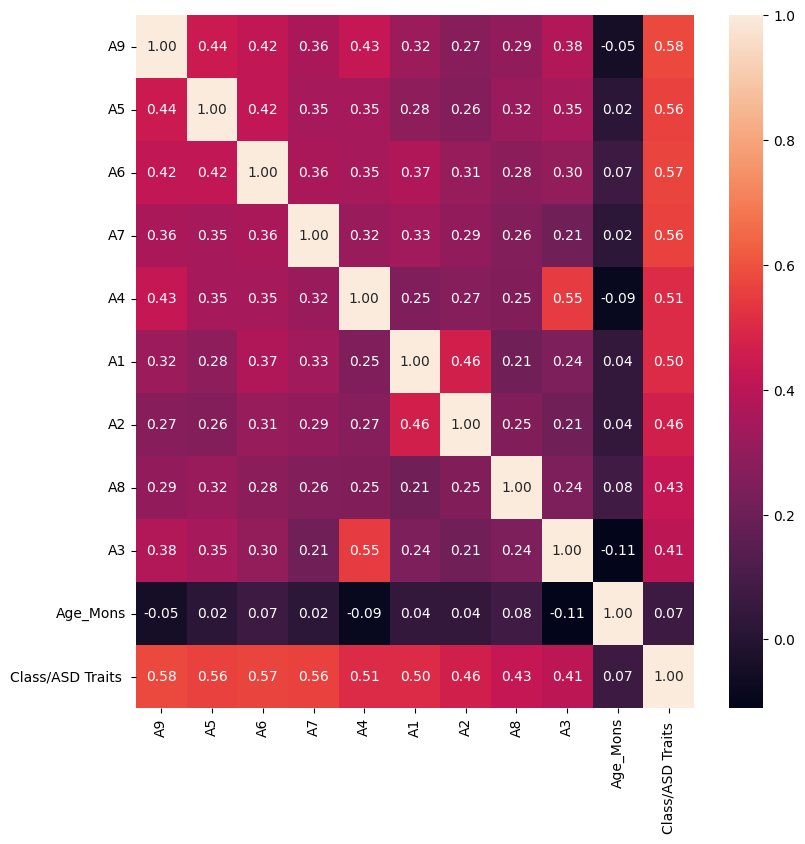

In [259]:
#medjusobna korelacija
pearson_R = data.corr(method = 'pearson')
plt.figure(figsize = (9,9))
sns.heatmap(pearson_R, annot = True, fmt=".2f")
plt.yticks(rotation = 0)
plt.show()

In [260]:
def findR(corr):
    k = corr.shape[1]-1
    rzi = corr.iloc[:-1, -1].mean()
    rij = corr.iloc[:-1, :-1].values.mean() - 1/k
    r = k*rzi/np.sqrt(k+k*(k-1)*rij)

    return np.abs(r)

In [261]:
r_total = findR(pearson_R)
print('Rukupno = ' + str(r_total))

Rukupno = 0.8375247150927593


In [262]:
rr = []
for kk in range(data.shape[1]-1):
    data_1 = data.drop(data.columns[kk], axis=1)
    corr_1 = data_1.corr(method='pearson')

    r = findR(corr_1)
    rr.append([data.columns[kk], r])

Rdf = pd.DataFrame(rr, columns=['obelezje', 'R'])
Rsorted = Rdf.sort_values(by=['R'], ascending=False, ignore_index=True)
Rsorted

,obelezje,R
0,Age_Mons,0.843315
1,A3,0.842099
2,A8,0.833220
3,A4,0.831837
4,A2,0.831062
5,A1,0.827687
6,A6,0.824912
7,A5,0.823610
8,A9,0.823125
9,A7,0.815554


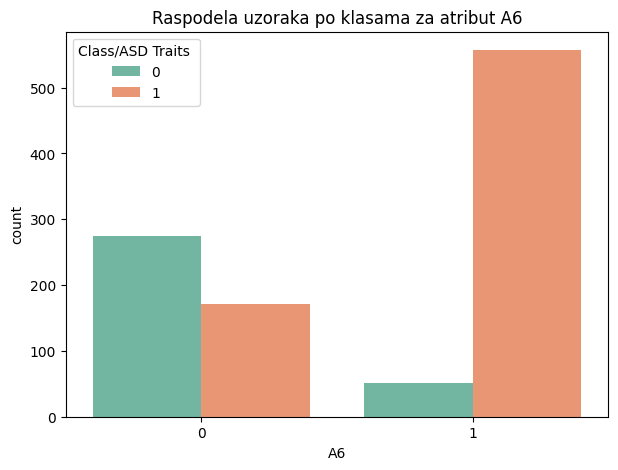

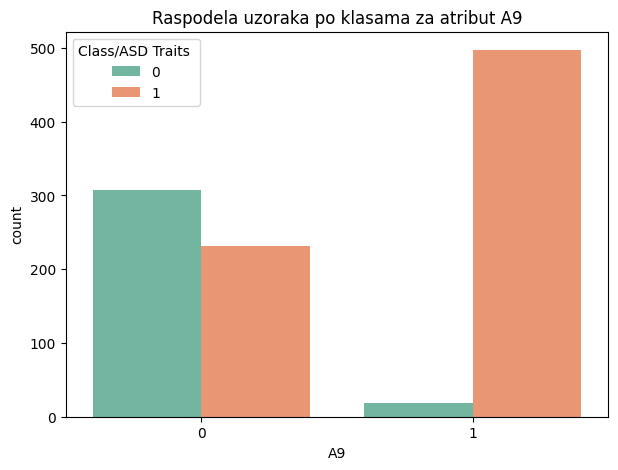

In [263]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='A6', hue='Class/ASD Traits ', palette='Set2')
plt.title('Raspodela uzoraka po klasama za atribut A6')
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(data=data, x='A9', hue='Class/ASD Traits ', palette='Set2')
plt.title('Raspodela uzoraka po klasama za atribut A9')
plt.show()

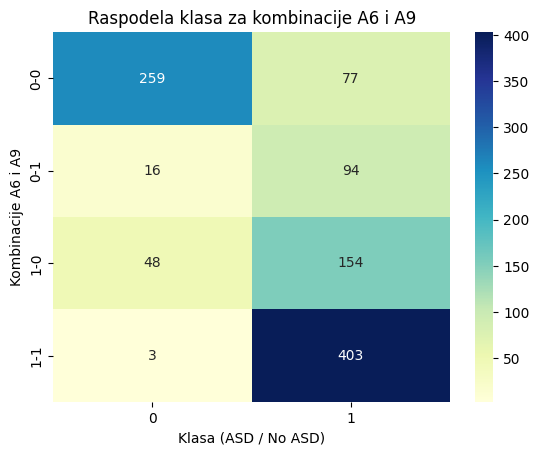

In [264]:

# tabela broja uzoraka po kombinacijama
pivot = pd.crosstab(index=[data['A6'], data['A9']], columns=data['Class/ASD Traits '])

sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Raspodela klasa za kombinacije A6 i A9')
plt.xlabel('Klasa (ASD / No ASD)')
plt.ylabel('Kombinacije A6 i A9')
plt.show()


In [265]:
def stats(X, y, target):
    Xk = X.loc[y==target, :]
    p = Xk.shape[0]/X.shape[0]
    M = Xk.mean().values.reshape(Xk.shape[1],1)
    S = Xk.cov().values

    return (p, M, S)



[ 2.07550842e+00+0.00000000e+00j  1.49170085e-16+0.00000000e+00j
  7.43074434e-17+0.00000000e+00j  2.68046900e-17+1.14193447e-17j
  2.68046900e-17-1.14193447e-17j -8.58366727e-18+0.00000000e+00j
 -1.08594659e-17+0.00000000e+00j -1.06319548e-16+2.25948920e-17j
 -1.06319548e-16-2.25948920e-17j -2.22044605e-16+0.00000000e+00j]


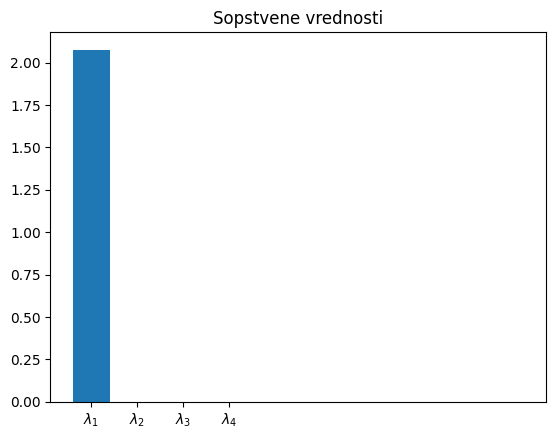

In [266]:
old_data = data
data = data.iloc[:, :-1]
y = target
p1, M1, S1 = stats(data, y, 1)
p2, M2, S2 = stats(data, y, 0)

M0 = p1*M1 + p2*M2
Sw = p1*S1 + p2*S2
Sb = p1*(M1-M0)@(M1-M0).T + p2*(M2-M0)@(M2-M0).T
Sm = Sb + Sw

S = np.linalg.inv(Sw)@Sb
eigval, eigvec = np.linalg.eig(S)

idx = np.argsort(eigval)[::-1]
eigval = eigval[idx]
eigvec = eigvec[:, idx]
print(eigval)

plt.figure()
plt.bar(np.arange(len(eigval))+1, eigval)
plt.title('Sopstvene vrednosti')
plt.xticks(ticks=[1, 2, 3, 4], labels=[r'$\lambda_1$',r'$\lambda_2$', r'$\lambda_3$', r'$\lambda_4$'])
plt.show()

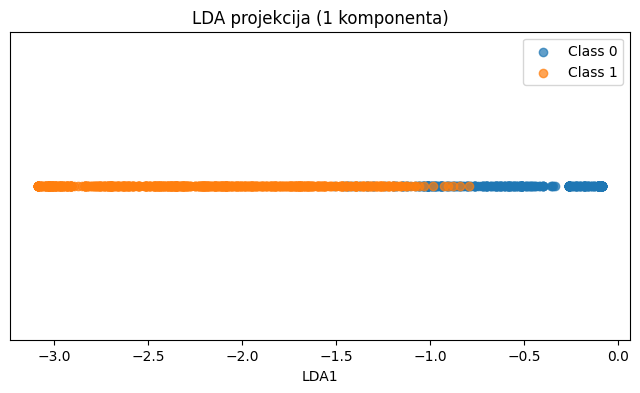

In [267]:
classes = y.unique()
no_comp = 1
A = eigvec[:, :no_comp]
Y = A.T @ data.T
Y = Y.T

LDAdf = pd.concat([Y , y] , axis = 1)
LDAdf.columns = ['LDA1', 'Class'] #ostaje samo jedna komponenta
plt.figure(figsize=(8,4))
for cls in classes:
    plt.scatter(
        LDAdf.loc[LDAdf['Class']==cls, 'LDA1'],
        [0]*sum(LDAdf['Class']==cls),  #pravi listu nula iste duzine kao maska
        label=f'Class {cls}',
        alpha=0.7
    )

plt.xlabel('LDA1')
plt.title('LDA projekcija (1 komponenta)')
plt.legend()
plt.yticks([])
plt.show()

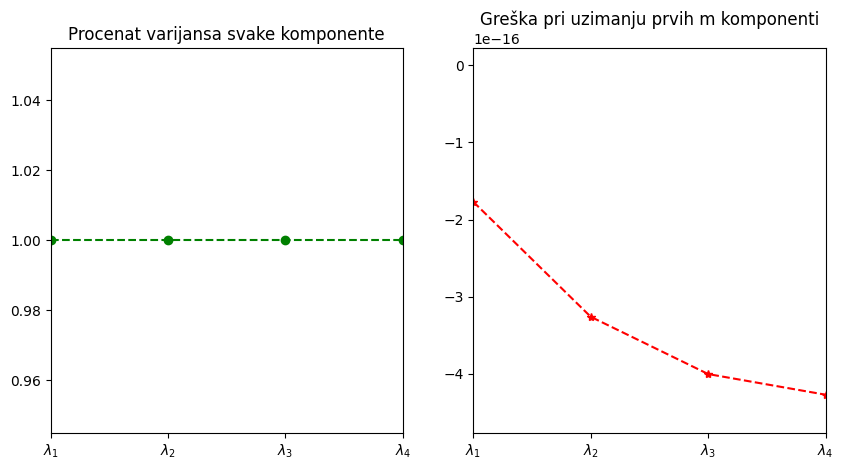

In [268]:
lda_var = eigval / np.sum(eigval)
lda_info_idx = np.cumsum(lda_var)

lda_err = np.zeros(eigval.shape)
for k in range(eigval.size):
    lda_err[k] = np.sum(eigval[k+1:])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.arange(len(lda_var))+1, lda_info_idx, 'go--')
plt.title('Procenat varijansa svake komponente')
plt.xticks(ticks=[1, 2, 3, 4], labels=[r'$\lambda_1$',r'$\lambda_2$', r'$\lambda_3$', r'$\lambda_4$'])
plt.xlim(1,4)

plt.subplot(122)
plt.plot(np.arange(len(lda_err))+1, lda_err, 'r*--')
plt.title('Greška pri uzimanju prvih m komponenti')
plt.xticks(ticks=[1, 2, 3, 4], labels=[r'$\lambda_1$',r'$\lambda_2$', r'$\lambda_3$', r'$\lambda_4$'])
plt.xlim(1,4)
plt.show()

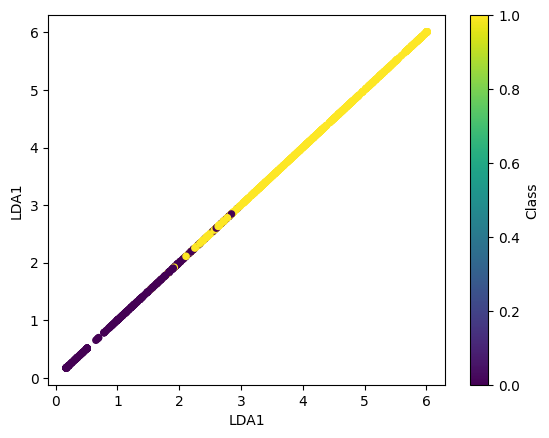

In [269]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='eigen', n_components=no_comp)
ldaComponents = lda.fit_transform(data, y)
ldaComponents = pd.DataFrame(data = ldaComponents)

LDAdf2 = pd.concat([ldaComponents, y] , axis = 1)
LDAdf2.columns = ['LDA1', 'Class']
LDAdf2.head()

LDAdf2.plot(x='LDA1', y=0, kind='scatter', c='Class', colormap='viridis')
plt.show()

In [270]:
#Parametarska klasifikacija

def fgv(x, m, s):
    det = np.linalg.det(s)
    inv = np.linalg.inv(s)
    x_mu = x - m

    fgv_const = 1/np.sqrt(2*np.pi*det)
    fgv_rest = np.exp(-0.5*x_mu.T@inv@x_mu)
    return fgv_const*fgv_rest

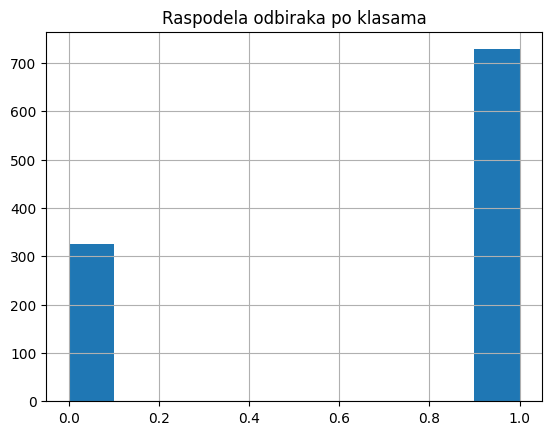

In [271]:
plt.figure()
target.hist()
plt.title('Raspodela odbiraka po klasama')
plt.show()

In [272]:
X1 = LDAdf.loc[LDAdf['Class'] == 1, :].drop(columns=['Class'])
N1 = X1.shape[0] #broj pozitivnih

X2  = LDAdf.loc[LDAdf['Class'] == 0, :].drop(columns=['Class'])
N2 = X2.shape[0] #broj negativnih

In [273]:
def createSubset(X, per, klasa):
    N = X.shape[0]
    Ntrening = int(per * N)
    Ntest = N - Ntrening

    Xtrening = X[:Ntrening].reset_index(drop=True)
    Ytrening = klasa * np.ones((Ntrening, 1))

    Xtest = X[Ntrening:].reset_index(drop=True)
    Ytest = klasa * np.ones((Ntest, 1))

    return Xtrening, Ytrening, Xtest, Ytest


In [274]:
X1trening, Y1trening, X1test, Y1test = createSubset(X1, 0.8, 1)
X2trening, Y2trening, X2test, Y2test = createSubset(X2, 0.8, 0)

In [275]:
M1p = X1trening.mean()
S1p = X1trening.cov()
print(f'Matematicko ocekivanje K1: \n {M1p}')
print(f'Kovarijaciona matrica K1: \n {S1p}')
M2p = X2trening.mean()
S2p = X2trening.cov()
print(f'Matematicko ocekivanje K2: \n {M2p}')
print(f'Kovarijaciona matrica K2: \n {S2p}')

Matematicko ocekivanje K1: 
 LDA1   -2.227572+0.000000j
dtype: complex128
Kovarijaciona matrica K1: 
           LDA1
LDA1  0.309077
Matematicko ocekivanje K2: 
 LDA1   -0.597677+0.000000j
dtype: complex128
Kovarijaciona matrica K2: 
           LDA1
LDA1  0.151227


In [276]:
p1 = X1trening.shape[0] / X1.shape[0]
p2 = X2trening.shape[0] / X2.shape[0]
T = np.log(p1/p2)

In [277]:
def decision(x, m1, m2, s1, s2):
    f1 = fgv(x, m1, s1)
    f2 = fgv(x, m2, s2)
    h = -np.log(f1) + np.log(f2)
    if h < T:
        dec = 1
    else:
        dec = 0

    return dec

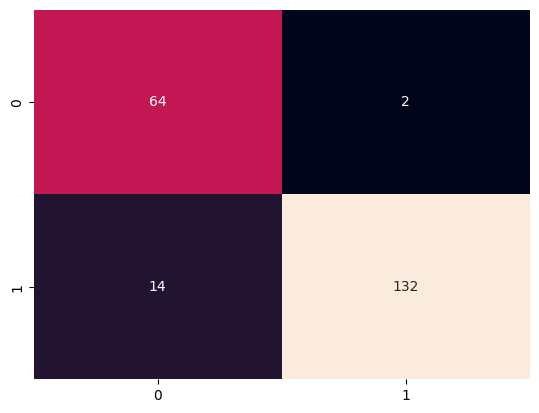

In [278]:
dec = np.zeros((X1test.shape[0] + X2test.shape[0], 1))

for i in range(X1test.shape[0]):
    x1 = X1test.iloc[i, :]
    dec[i] = decision(x1, M1p, M2p, S1p, S2p)

for i in range(X2test.shape[0]):
    x2 = X2test.iloc[i, :]
    dec[i+X1test.shape[0]] = decision(x2, M1p, M2p, S1p, S2p)

Xtest = np.append(X1test, X2test, axis=0)
Ytest = np.append(Y1test, Y2test, axis=0)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Ytest, dec)
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

In [279]:
TP = conf_mat[1, 1]
print(f'Broj stvarno pozitivnih primeraka ima {TP}')

FP = conf_mat[1, 0]
print(f'Broj lazno pozitivnih primeraka ima {FP}')

TN = conf_mat[0, 0]
print(f'Broj stvarno negativnih primeraka ima {TN}')

FN = conf_mat[0, 1]
print(f'Broj lazno negativnih primeraka ima {FN}')

tacnost = 100*np.trace(conf_mat)/np.sum(conf_mat)
print(f'Tacnost klasifikacije iznosti {tacnost:.2f}%')

preciznost = 100*TP/(TP + FP)
print(f'Preciznost klasifikacije iznosti {preciznost:.2f}%')

senzitivnost = 100*TP/(TP + FN)
print(f'Senzitivnost klasifikacije iznosti {senzitivnost:.2f}%')

specificnost = 100*TN/(TN + FP)
print(f'Specificnost klasifikacije iznosti {specificnost:.2f}%')

F1 = 2*preciznost*senzitivnost/(preciznost + senzitivnost)
print(f'F score {F1:.2f}%')

tacnost_b = (specificnost + senzitivnost) / 2
print(f'Balansirana tacnost klasifikacije iznosti {tacnost_b:.2f}%')

FPR = 100*FP/(TN + FP)
print(f'Stopa laznih alarma {FPR:.2f}%')

FNR = 100*FN/(FN + TP)
print(f'Stopa lažno negativnih iznosti {FNR:.2f}%')

Broj stvarno pozitivnih primeraka ima 132
Broj lazno pozitivnih primeraka ima 14
Broj stvarno negativnih primeraka ima 64
Broj lazno negativnih primeraka ima 2
Tacnost klasifikacije iznosti 92.45%
Preciznost klasifikacije iznosti 90.41%
Senzitivnost klasifikacije iznosti 98.51%
Specificnost klasifikacije iznosti 82.05%
F score 94.29%
Balansirana tacnost klasifikacije iznosti 90.28%
Stopa laznih alarma 17.95%
Stopa lažno negativnih iznosti 1.49%


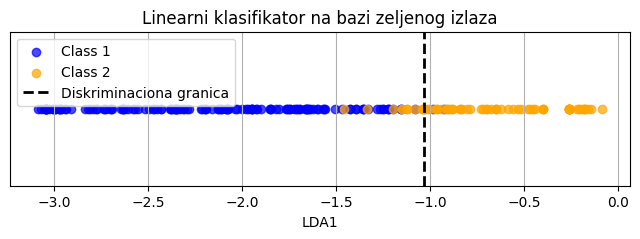

In [280]:


Z1 = np.concatenate((-X1trening,  -np.ones((X1trening.shape[0], 1))), axis=1).T
Z2 = np.concatenate((X2trening, np.ones((X2trening.shape[0], 1))), axis=1).T

U = np.append(Z1, Z2, axis=1)
Gama = np.append(1.5*np.ones((X1trening.shape[0], 1)), np.ones((X2trening.shape[0], 1)), axis=0)
W = np.linalg.inv(U@U.T)@U@Gama

V = W[:-1]
V0 = W[-1]

x_granica = -V0 / V[0]

plt.figure(figsize=(8, 2))


plt.scatter(X1test, np.zeros_like(X1test), c='blue', label='Class 1', alpha=0.7)

plt.scatter(X2test, np.zeros_like(X2test), c='orange', label='Class 2', alpha=0.7)

plt.axvline(x=x_granica, color='k', linestyle='--', linewidth=2, label='Diskriminaciona granica')

plt.xlabel('LDA1')
plt.yticks([])
plt.title('Linearni klasifikator na bazi zeljenog izlaza')
plt.legend()
plt.grid(True, axis='x')
plt.show()

Broj stvarno pozitivnih primeraka ima 55
Broj lazno pozitivnih primeraka ima 11
Broj stvarno negativnih primeraka ima 144
Broj lazno negativnih primeraka ima 2
Tacnost klasifikacije iznosti 93.87%
Preciznost klasifikacije iznosti 83.33%
Senzitivnost klasifikacije iznosti 96.49%
Specificnost klasifikacije iznosti 92.90%
F score 89.43%
Balansirana tacnost klasifikacije iznosti 94.70%
Stopa laznih alarma 7.10%
Stopa lažno negativnih iznosti 3.51%


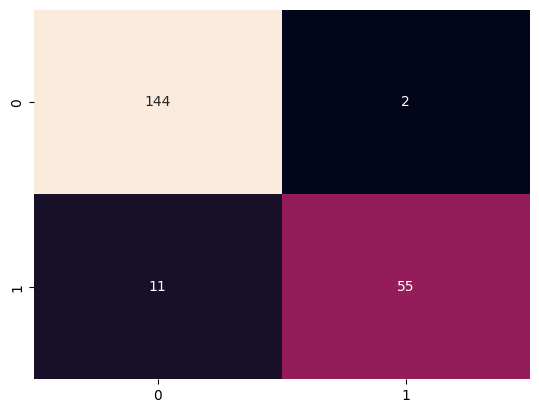

In [281]:
y_true = np.append(np.ones(len(X1test)), np.zeros(len(X2test)))
y_pred = np.where(np.append(X1test, X2test) > x_granica, 0, 1)

conf_mat = confusion_matrix(y_true, y_pred, labels=[1, 0])
TP = conf_mat[1, 1]
print(f'Broj stvarno pozitivnih primeraka ima {TP}')

FP = conf_mat[1, 0]
print(f'Broj lazno pozitivnih primeraka ima {FP}')

TN = conf_mat[0, 0]
print(f'Broj stvarno negativnih primeraka ima {TN}')

FN = conf_mat[0, 1]
print(f'Broj lazno negativnih primeraka ima {FN}')

tacnost = 100*np.trace(conf_mat)/np.sum(conf_mat)
print(f'Tacnost klasifikacije iznosti {tacnost:.2f}%')

preciznost = 100*TP/(TP + FP)
print(f'Preciznost klasifikacije iznosti {preciznost:.2f}%')

senzitivnost = 100*TP/(TP + FN)
print(f'Senzitivnost klasifikacije iznosti {senzitivnost:.2f}%')

specificnost = 100*TN/(TN + FP)
print(f'Specificnost klasifikacije iznosti {specificnost:.2f}%')

F1 = 2*preciznost*senzitivnost/(preciznost + senzitivnost)
print(f'F score {F1:.2f}%')

tacnost_b = (specificnost + senzitivnost) / 2
print(f'Balansirana tacnost klasifikacije iznosti {tacnost_b:.2f}%')

FPR = 100*FP/(TN + FP)
print(f'Stopa laznih alarma {FPR:.2f}%')

FNR = 100*FN/(FN + TP)
print(f'Stopa lažno negativnih iznosti {FNR:.2f}%')

plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier as KNN

X = LDAdf.drop(columns=['Class'])
Y = target

Xtraining, Xtest, Ytraining, Ytest = train_test_split(X, Y, train_size=2/3, random_state=42, stratify=Y)

Tacnost klasifikacije je : 96.31%.
Broj stvarno pozitivnih primeraka ima 55
Broj lazno pozitivnih primeraka ima 11
Broj stvarno negativnih primeraka ima 144
Broj lazno negativnih primeraka ima 2
Tacnost klasifikacije iznosti 93.87%
Preciznost klasifikacije iznosti 83.33%
Senzitivnost klasifikacije iznosti 96.49%
Specificnost klasifikacije iznosti 92.90%
F score 89.43%
Balansirana tacnost klasifikacije iznosti 94.70%
Stopa lažnih alarma iznosti 7.10%
Stopa lažno negativnih iznosti 3.51%


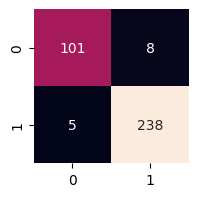

In [283]:
#Neparametarska klasifikacija - KNN
k = 41

pred = np.zeros((Xtest.shape[0],))
for i in range(Xtest.shape[0]):
    tren_test = Xtest.iloc[i, :]
    dist = np.zeros((Xtraining.shape[0],))
    for j in range(Xtraining.shape[0]):
        tren_training = Xtraining.iloc[j, :]

        dist[j] = np.sqrt(np.sum((tren_test - tren_training)**2))

    idx = np.argsort(dist)[:k]
    nearest = Ytraining.iloc[idx]

    val, cnt = np.unique(nearest, return_counts=True)

    pred[i] = val[np.argmax(cnt)]
acc = accuracy_score(Ytest, pred)
print(f'Tacnost klasifikacije je : {100*acc:.2f}%.')

TP = conf_mat[1, 1]
print(f'Broj stvarno pozitivnih primeraka ima {TP}')

FP = conf_mat[1, 0]
print(f'Broj lazno pozitivnih primeraka ima {FP}')

TN = conf_mat[0, 0]
print(f'Broj stvarno negativnih primeraka ima {TN}')

FN = conf_mat[0, 1]
print(f'Broj lazno negativnih primeraka ima {FN}')

tacnost = 100*np.trace(conf_mat)/np.sum(conf_mat)
print(f'Tacnost klasifikacije iznosti {tacnost:.2f}%')

preciznost = 100*TP/(TP + FP)
print(f'Preciznost klasifikacije iznosti {preciznost:.2f}%')

senzitivnost = 100*TP/(TP + FN)
print(f'Senzitivnost klasifikacije iznosti {senzitivnost:.2f}%')

specificnost = 100*TN/(TN + FP)
print(f'Specificnost klasifikacije iznosti {specificnost:.2f}%')

F1 = 2*preciznost*senzitivnost/(preciznost + senzitivnost)
print(f'F score {F1:.2f}%')

tacnost_b = (specificnost + senzitivnost) / 2
print(f'Balansirana tacnost klasifikacije iznosti {tacnost_b:.2f}%')

FPR = 100*FP/(TN + FP)
print(f'Stopa lažnih alarma iznosti {FPR:.2f}%')

FNR = 100*FN/(FN + TP)
print(f'Stopa lažno negativnih iznosti {FNR:.2f}%')


conf_mat = confusion_matrix(Ytest, pred)
plt.figure(figsize=(2,2))
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

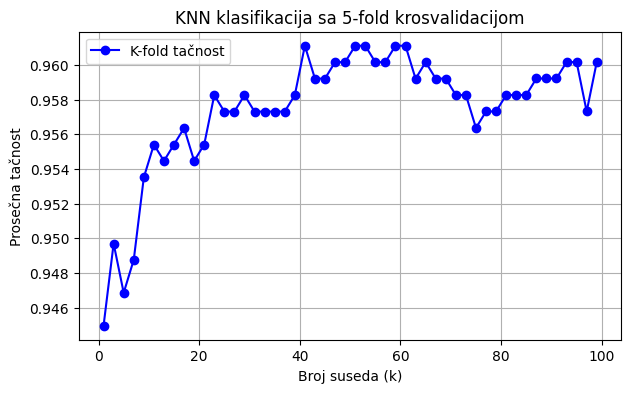

Optimalno k = 41, prosečna tačnost = 96.11%


In [284]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
X = np.real(LDAdf.drop(columns=['Class']).values)
Y = np.real(target)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

k_values = np.arange(1, 100, 2)
acc_cv = np.zeros((k_values.size,))

for i, k in enumerate(k_values):
    model = KNN(n_neighbors=k)
    scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')
    acc_cv[i] = np.mean(scores)

# Graf
plt.figure(figsize=(7,4))
plt.plot(k_values, acc_cv, 'b-o', label='K-fold tačnost')
plt.xlabel('Broj suseda (k)')
plt.ylabel('Prosečna tačnost')
plt.title('KNN klasifikacija sa 5-fold krosvalidacijom')
plt.grid(True)
plt.legend()
plt.show()

best_k = k_values[np.argmax(acc_cv)]
print(f'Optimalno k = {best_k}, prosečna tačnost = {100*np.max(acc_cv):.2f}%')

In [285]:
import tensorflow as tf

In [286]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

X = np.real(LDAdf.drop(columns=['Class']).values)
Y = np.real(target)

K0 = X[Y == 0, :]
K1 = X[Y == 1, :]

X2klase = np.append(K0, K1, axis=0)
Y2klase = np.append(np.zeros((K0.shape[0], 1)), np.ones((K1.shape[0], 1)), axis=0)

X2trening, X2test, Y2trening, Y2test = train_test_split(X2klase, Y2klase, test_size=0.2, shuffle=True, random_state=20)


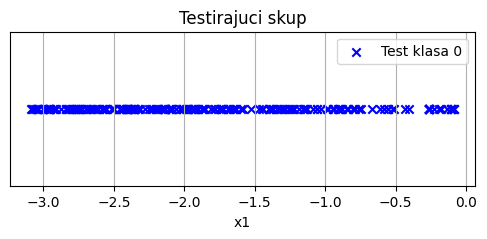

In [287]:
#provera da imamo test podatke iz obe klase

plt.figure(figsize=(6, 2))
plt.axis('equal')
plt.scatter(
    X2test,
    np.zeros(len(X2test)),
    label='Test klasa 0',
    color='blue',
    marker='x'
)
plt.xlabel('x1')
plt.yticks([])
plt.legend()
plt.title('Testirajuci skup')
plt.grid(True, axis='x')
plt.show()

In [288]:
model = Sequential()
model.add(Input(shape=(X2trening.shape[1], )))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [289]:
max_epochs = 100

model.compile('adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=X2trening, y=Y2trening, epochs=max_epochs,validation_data=(X2test, Y2test), batch_size=32, shuffle=True, verbose=0)

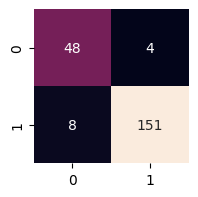

In [290]:
Y2pred = model.predict(X2test, verbose=0)
Y2pred = np.round(Y2pred)

conf_mat = confusion_matrix(Y2test, Y2pred)
plt.figure(figsize=(2,2))
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()

In [291]:
TP = conf_mat[1, 1]
print(f'Broj stvarno pozitivnih primeraka ima {TP}')

FP = conf_mat[1, 0]
print(f'Broj lazno pozitivnih primeraka ima {FP}')

TN = conf_mat[0, 0]
print(f'Broj stvarno negativnih primeraka ima {TN}')

FN = conf_mat[0, 1]
print(f'Broj lazno negativnih primeraka ima {FN}')

tacnost = 100*np.trace(conf_mat)/np.sum(conf_mat)
print(f'Tacnost klasifikacije iznosti {tacnost:.2f}%')

preciznost = 100*TP/(TP + FP)
print(f'Preciznost klasifikacije iznosti {preciznost:.2f}%')

senzitivnost = 100*TP/(TP + FN)
print(f'Senzitivnost klasifikacije iznosti {senzitivnost:.2f}%')

specificnost = 100*TN/(TN + FP)
print(f'Specificnost klasifikacije iznosti {specificnost:.2f}%')

F1 = 2*preciznost*senzitivnost/(preciznost + senzitivnost)
print(f'F score {F1:.2f}%')

tacnost_b = (specificnost + senzitivnost) / 2
print(f'Balansirana tacnost klasifikacije iznosti {tacnost_b:.2f}%')

FPR = 100*FP/(TN + FP)
print(f'Stopa laznih alarma {FPR:.2f}%')

FNR = 100*FN/(FN + TP)
print(f'Stopa lažno negativnih iznosti {FNR:.2f}%')


Broj stvarno pozitivnih primeraka ima 151
Broj lazno pozitivnih primeraka ima 8
Broj stvarno negativnih primeraka ima 48
Broj lazno negativnih primeraka ima 4
Tacnost klasifikacije iznosti 94.31%
Preciznost klasifikacije iznosti 94.97%
Senzitivnost klasifikacije iznosti 97.42%
Specificnost klasifikacije iznosti 85.71%
F score 96.18%
Balansirana tacnost klasifikacije iznosti 91.57%
Stopa laznih alarma 14.29%
Stopa lažno negativnih iznosti 2.58%


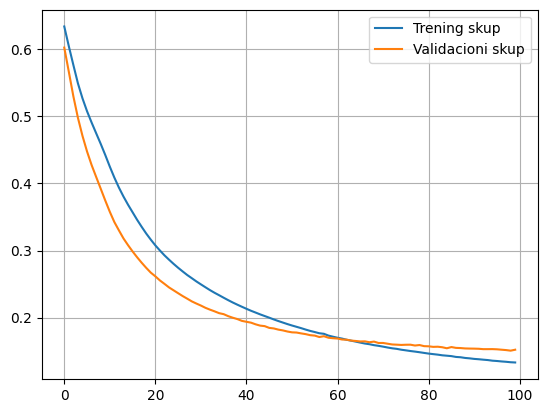

In [292]:
plt.figure()
plt.plot(history.history['loss'], label='Trening skup')
plt.plot(history.history['val_loss'], label='Validacioni skup')
#plt.ylim(0, 0.2)
plt.legend()
plt.grid()
plt.show()

Epoch 21: early stopping


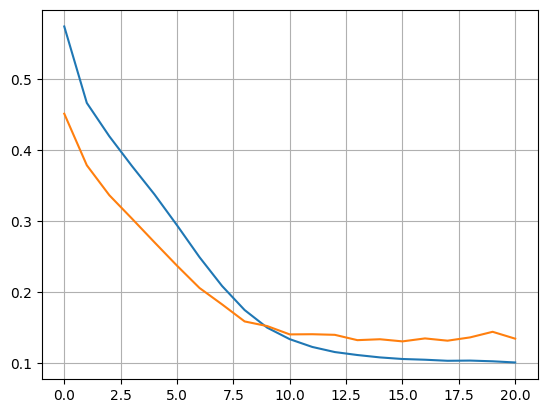

In [293]:
model = Sequential()
model.add(Input(shape=(X2trening.shape[1], )))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

model.compile('adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=X2trening, y=Y2trening, epochs=1000, batch_size=32, shuffle=True, validation_data=(X2test, Y2test), callbacks=[es], verbose=0)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.show()

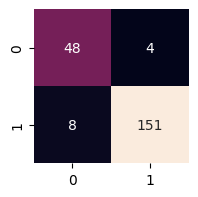

Tacnost klasifikacije iznosti 94.31%


In [294]:
Y2pred = model.predict(X2test, verbose=0)
Y2pred = np.round(Y2pred)
conf_mat = confusion_matrix(Y2test, Y2pred)
plt.figure(figsize=(2,2))
sns.heatmap(conf_mat, annot=True, fmt='g', cbar=False)
plt.show()
tacnost = 100*np.trace(conf_mat)/np.sum(conf_mat)
print(f'Tacnost klasifikacije iznosti {tacnost:.2f}%')

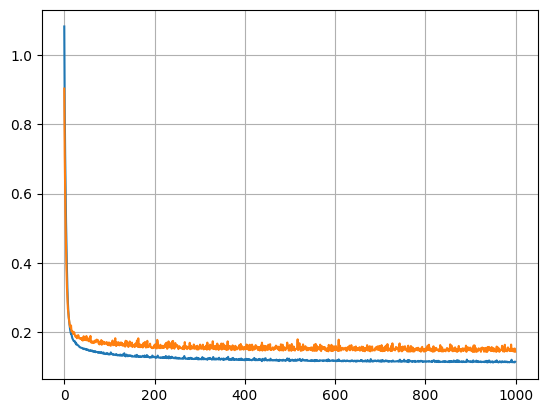

In [295]:
model = Sequential()
model.add(Input(shape=(X2trening.shape[1], )))
model.add(Dense(80, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=X2trening, y=Y2trening, epochs=1000, batch_size=32, shuffle=True, validation_data=(X2test, Y2test),  verbose=0)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.show()